# Eigenvalues and Eigenvectors

## References

- [Motivating Eigenvalues and Eigenvectors](https://www.youtube.com/watch?v=QYS-ML_vn4k)
- [Eigenvalues and Eigenvectors](https://www.youtube.com/watch?v=ZSGrJBS_qtc)
- [Solving Systems of Differential Equations with Eigenvalues and Eigenvectors](https://www.youtube.com/watch?v=Zwb5eiYcL8w)

Depending on the matrix A, the solution to this differential equation is eitheer simple or complex.

$$
\dot x = A x \\
x(t) = e^{At}x(0)
$$

1. Decoupled: all elements of x are independ on other elements of x, easy to solve since the matrix $A$ is diagonal
1. Coupled:  elements of x are dependant of other elements of x, really hard to solve

Therefore we want to find a coordinate transform $T$ that takes a coupled matrix $A$ and diagonalize it.

$$
\dot x = A x \rightarrow \dot z = Dz \\
x = Tz \\
AT = TD \\
D = T^{-1} AT \\
A = TDT^{-1}
$$

where

- $T$: columns of eigenvectors
- $D$: diagonal of eigenvalues

The solution can be found by taking the Taylor expansion to the exponential like:

$$
e^x = 1 + x + \frac{x^2}{2!} + \frac {x^3}{3!} + ... 
$$

Thus the solution is:

$$
\dot x = A x, x(0) \rightarrow x(t) = e^{At}x(0) \\
e^{At} = I + At + \frac{A^2t^2}{2!} + \frac {A^3t^3}{3!} + ... \\
\begin{align}
A^2 &= (TDT^{-1})(TDT^{-1}) = TD^2T^{-1} \\
A^3 &= (TDT^{-1})(TDT^{-1})(TDT^{-1}) = TD^3T^{-1} \\
A^n &= TD^nT^{-1} \\
\end{align}
$$

which simplifies down to:

$$
\begin{align}
e^{At} &= T \left[ I + Dt + \frac{D^2t^2}{2!} + \frac {D^3t^3}{3!} + ... \right] T^{-1} \\
       &= T e^{Dt} T^{-1}
\end{align}
$$

Substituting this in to the original differential equation we want to solve,
we can show the solution is equal to the transformed solution times the
transform.

$$
\dot x = A x \\
\begin{align}
x(t) &= T e^{Dt} T^{-1} x(0) \\
     &= T e^{Dt} z(0) \\
     &= T z(t) \\
\end{align}
$$

where 

$$
e^{Dt} = \begin{bmatrix}
    e^{\lambda_1 t} & & & \\
    & e^{\lambda_2 t} & & \\
    & & \ddots & \\
    & & & e^{\lambda_n t}
\end{bmatrix}
$$

In [3]:
import numpy as np
from numpy.linalg import eig, inv
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

from matplotlib import pyplot as plt

In [4]:
A = np.array([[0,1],[-2,-3]])

eigvals, eigvecs = eig(A)

print(eigvals)
print(eigvecs)

D = inv(eigvecs) @ A @ eigvecs
print(D)

AA = eigvecs @ D @ inv(eigvecs)
print(AA)

[-1. -2.]
[[ 0.707 -0.447]
 [-0.707  0.894]]
[[-1.  0.]
 [ 0. -2.]]
[[ 0.  1.]
 [-2. -3.]]


## Stable or Unstable

> $\dot x = A x$ is stable if all eigenvalues $\lambda$ are stable and unstable if even one eigenvalue is unstable. The eigenvalue is stable if it is **negative**, which causes the system to decrease to zero. If the $\lambda$ is complex, then the **real part** needs to negative.

$$
\lambda = a + ib \\
\begin{align}
e^{\lambda t} &= e^{at + ibt} \\ 
              &= e^{at} e^{ibt} \\
              &= e^{at} \left[ \cos(bt) + i\sin(bt) \right] \\
\end{align}
$$

The complex part only provides unit oscillations, but does not impact stability. The real part ($e^{at} $) is what causes the solution to either grow without bounds or shrink to zero.

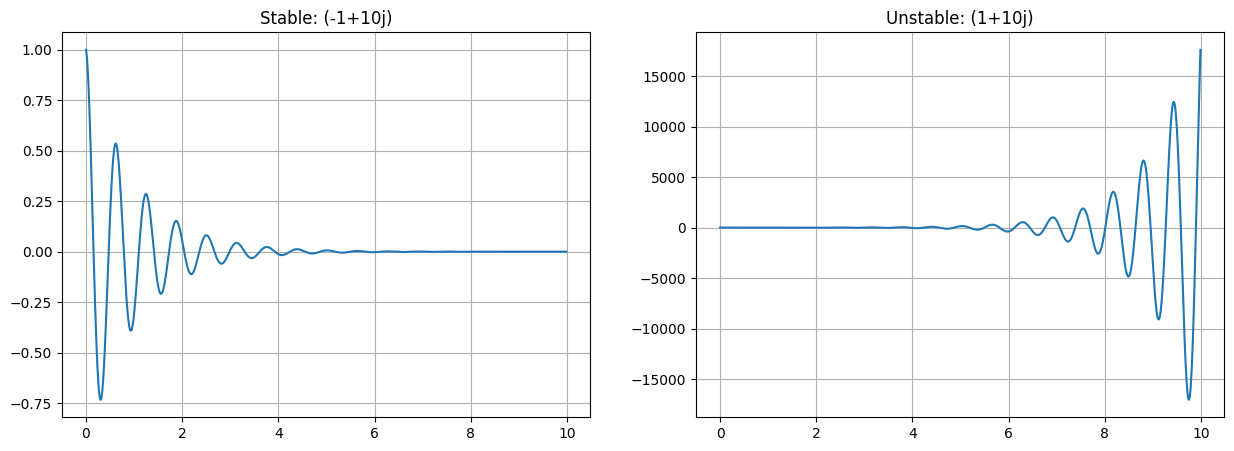

In [35]:
plt.figure(figsize=(15,5))
t = np.arange(0,10,0.01)
plt.subplot(1,2,1)
ev = -1 + 10j
y = np.e**(ev*t)
plt.plot(t,y)
plt.grid(True)
plt.title(f"Stable: {ev}")

plt.subplot(1,2,2)
ev = 1 + 10j
y = np.e**(ev*t)
plt.plot(t,y)
plt.grid(True)
plt.title(f"Unstable: {ev}");